In [401]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [402]:
warnings.filterwarnings('ignore')

In [403]:
data = pd.read_csv("/content/INDUSINDBK.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


In [404]:
data.drop(['Date'], axis=1, inplace=True)

In [405]:
print(data.head())
print(data.shape)
print(data.columns)

       Symbol Series  Prev Close   Open   High    Low   Last  Close   VWAP  \
0  INDUSINDBK     EQ       26.80  28.90  28.95  28.00  28.95  28.95  28.69   
1  INDUSINDBK     EQ       28.95  30.85  31.25  27.90  30.60  30.25  29.12   
2  INDUSINDBK     EQ       30.25  29.90  30.00  27.85  28.45  28.15  28.72   
3  INDUSINDBK     EQ       28.15  29.25  29.35  27.95  27.95  28.00  28.55   
4  INDUSINDBK     EQ       28.00  27.20  28.00  26.50  27.20  27.05  27.09   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  107224  3.075827e+11     NaN                 NaN          NaN  
1  182693  5.320731e+11     NaN                 NaN          NaN  
2  162820  4.675717e+11     NaN                 NaN          NaN  
3   87901  2.510007e+11     NaN                 NaN          NaN  
4   65684  1.779190e+11     NaN                 NaN          NaN  
(4985, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 

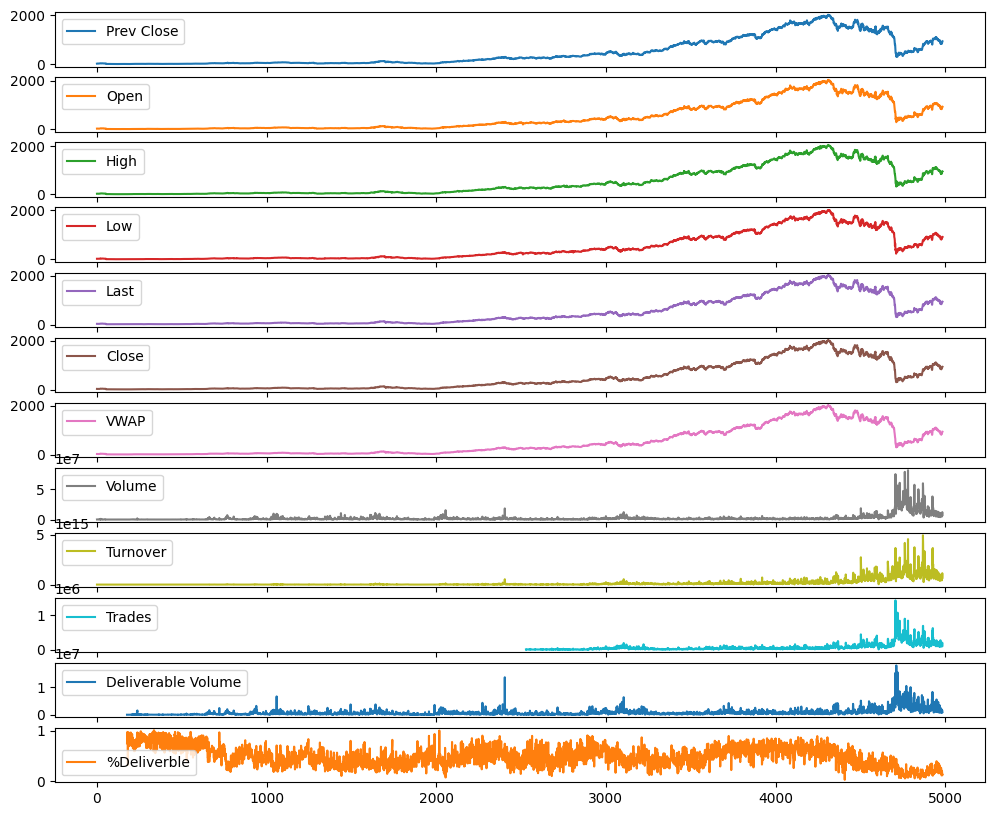

Symbol                   1
Series                   1
Prev Close            3777
Open                  3313
High                  3560
Low                   3530
Last                  3562
Close                 3778
VWAP                  4609
Volume                4976
Turnover              4985
Trades                2428
Deliverable Volume    4788
%Deliverble           3486
dtype: int64

In [406]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [407]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
1,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
3,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
4,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


          Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     INDUSINDBK     EQ       26.80   28.90   28.95   28.00   28.95   28.95   
1     INDUSINDBK     EQ       28.95   30.85   31.25   27.90   30.60   30.25   
2     INDUSINDBK     EQ       30.25   29.90   30.00   27.85   28.45   28.15   
3     INDUSINDBK     EQ       28.15   29.25   29.35   27.95   27.95   28.00   
4     INDUSINDBK     EQ       28.00   27.20   28.00   26.50   27.20   27.05   
...          ...    ...         ...     ...     ...     ...     ...     ...   
4980  INDUSINDBK     EQ      850.00  857.00  870.95  851.45  859.00  859.55   
4981  INDUSINDBK     EQ      859.55  859.55  886.00  859.00  883.55  882.45   
4982  INDUSINDBK     EQ      882.45  890.00  931.00  888.00  925.90  926.90   
4983  INDUSINDBK     EQ      926.90  936.85  958.85  917.10  942.45  939.45   
4984  INDUSINDBK     EQ      939.45  928.00  948.50  915.10  934.95  934.95   

        VWAP    Volume      Turnover    Trades  Del

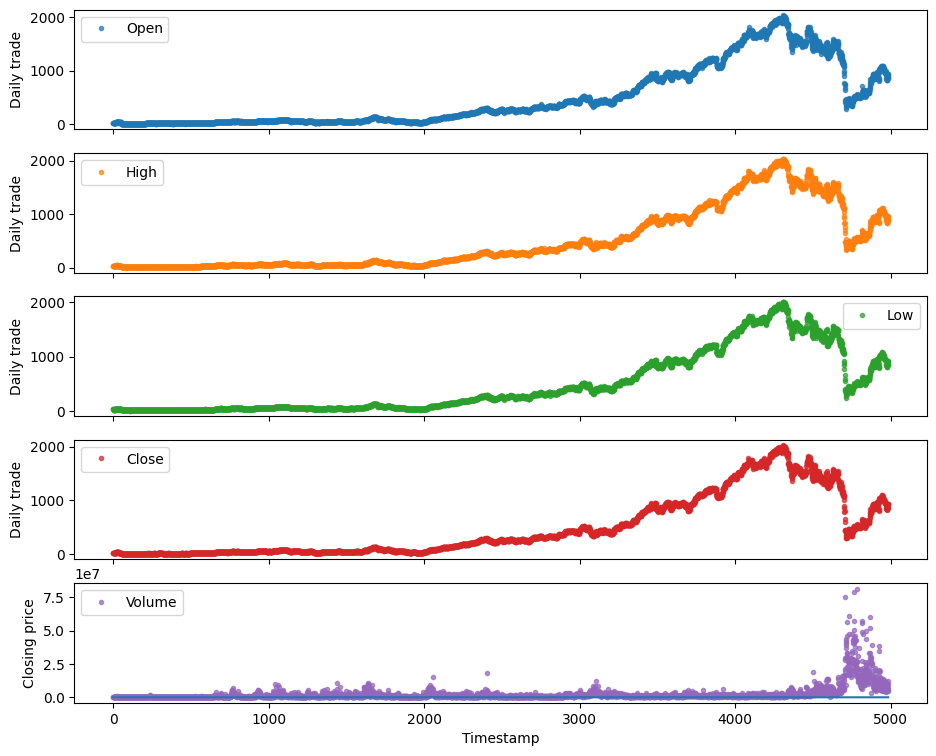

In [408]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [409]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2529
Deliverable Volume     188
%Deliverble            188
dtype: int64

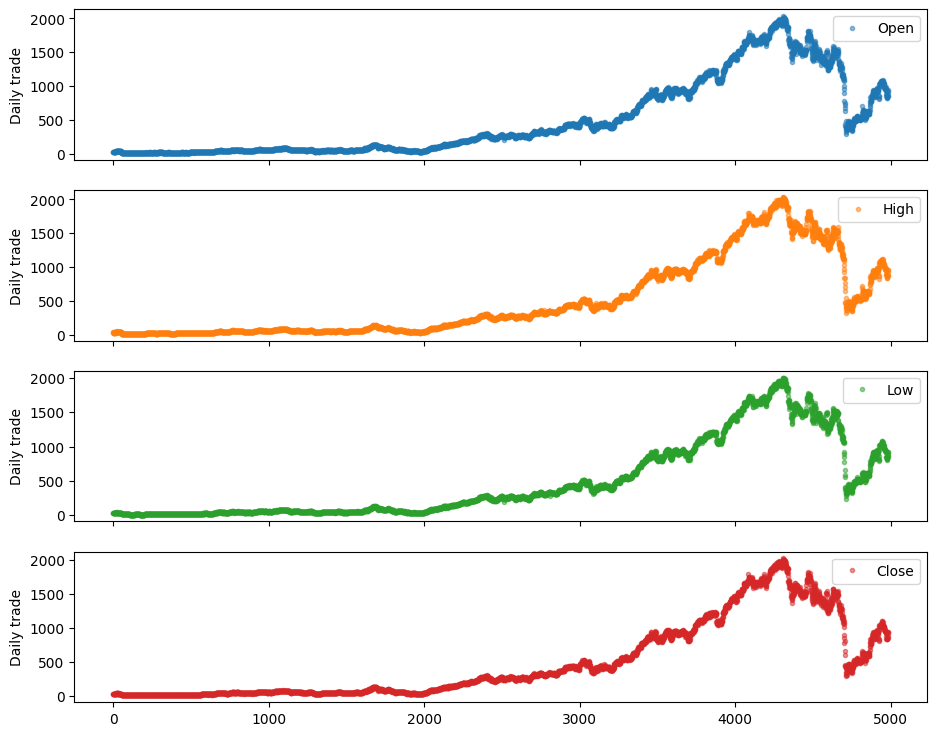

In [410]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     INDUSINDBK     EQ       26.80   28.90   28.95   28.00   28.95   28.95   
1     INDUSINDBK     EQ       28.95   30.85   31.25   27.90   30.60   30.25   
2     INDUSINDBK     EQ       30.25   29.90   30.00   27.85   28.45   28.15   
3     INDUSINDBK     EQ       28.15   29.25   29.35   27.95   27.95   28.00   
4     INDUSINDBK     EQ       28.00   27.20   28.00   26.50   27.20   27.05   
...          ...    ...         ...     ...     ...     ...     ...     ...   
4980  INDUSINDBK     EQ      850.00  857.00  870.95  851.45  859.00  859.55   
4981  INDUSINDBK     EQ      859.55  859.55  886.00  859.00  883.55  882.45   
4982  INDUSINDBK     EQ      882.45  890.00  931.00  888.00  925.90  926.90   
4983  INDUSINDBK     EQ      926.90  936.85  958.85  917.10  942.45  939.45   
4984  INDUSINDBK     EQ      939.45  928.00  948.50  915.10  934.95  934.95   

        VWAP    Volume      Turnover    Trades  Del

,count,mean,std,min,25%,50%,75%,max
Prev Close,4985.0,4.941376e+02,5.627250e+02,9.150000e+00,4.840000e+01,2.551000e+02,8.739500e+02,2.023050e+03
Open,4985.0,4.948567e+02,5.632005e+02,8.500000e+00,4.880000e+01,2.550000e+02,8.750000e+02,2.033100e+03
High,4985.0,5.019264e+02,5.692673e+02,9.750000e+00,4.980000e+01,2.614000e+02,8.860000e+02,2.038000e+03
Low,4985.0,4.869913e+02,5.562322e+02,8.500000e+00,4.730000e+01,2.507000e+02,8.585000e+02,2.003450e+03
Last,4985.0,4.943420e+02,5.627794e+02,9.100000e+00,4.845000e+01,2.551000e+02,8.740000e+02,2.022000e+03
Close,4985.0,4.943227e+02,5.627182e+02,9.150000e+00,4.845000e+01,2.552500e+02,8.745500e+02,2.023050e+03
VWAP,4985.0,4.945632e+02,5.627402e+02,9.210000e+00,4.867000e+01,2.554300e+02,8.728300e+02,2.022360e+03
Volume,4985.0,2.351251e+06,5.664769e+06,2.000000e+02,4.119510e+05,8.692310e+05,1.772702e+06,8.133645e+07
Turnover,4985.0,1.531780e+14,3.679600e+14,2.650000e+08,3.268398e+12,1.972708e+13,1.118311e+14,4.942748e+15
Trades,2456.0,7.324800e+04,1.090752e+05,4.040000e+02,1.744125e+04,3.749000e+04,8.079375e+04,1.424793e+06


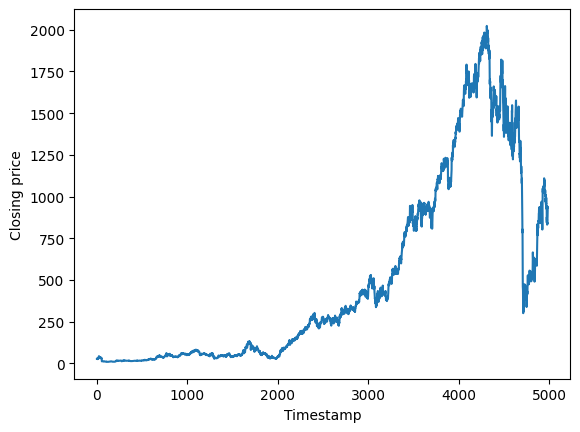

In [411]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [412]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3906
977


In [413]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
62/62 [==============================] - 5s 14ms/step - loss: 0.0553 - mse: 0.0553 - mae: 0.1454 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0659
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0589 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0501
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0491 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0436
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0434 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0421
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0406 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0382
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0374 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0386
Epoch 7/100
62/62 [==

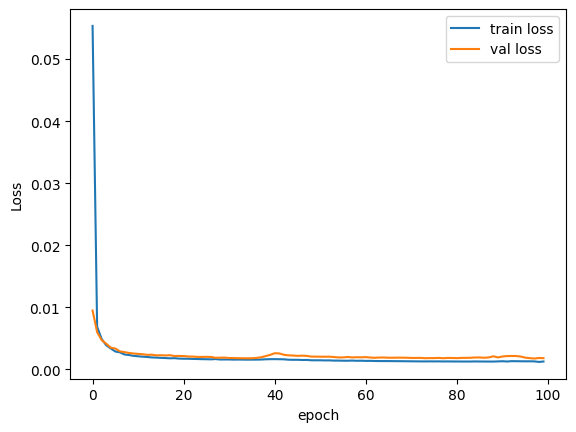

In [414]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

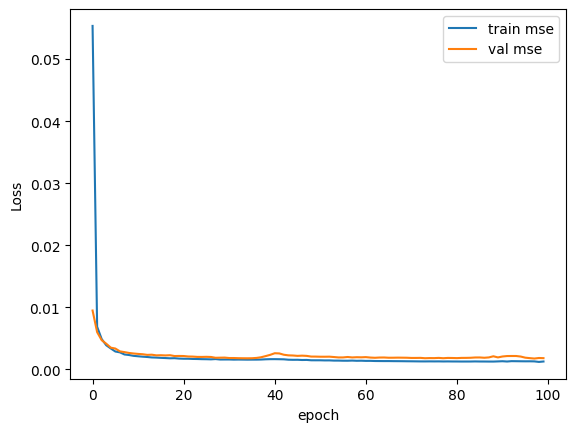

In [415]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

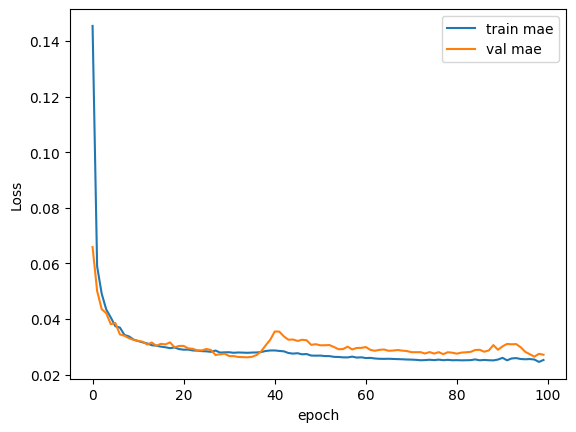

In [416]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_31 (LSTM)              (None, 32)                6272      
                                                                 
 dense_75 (Dense)            (None, 64)                2112      
                                                                 
 dense_76 (Dense)            (None, 64)                4160      
                                                                 
 activation_45 (Activation)  (None, 64)                0         
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 activation_46 (Activation)  (None, 64)              

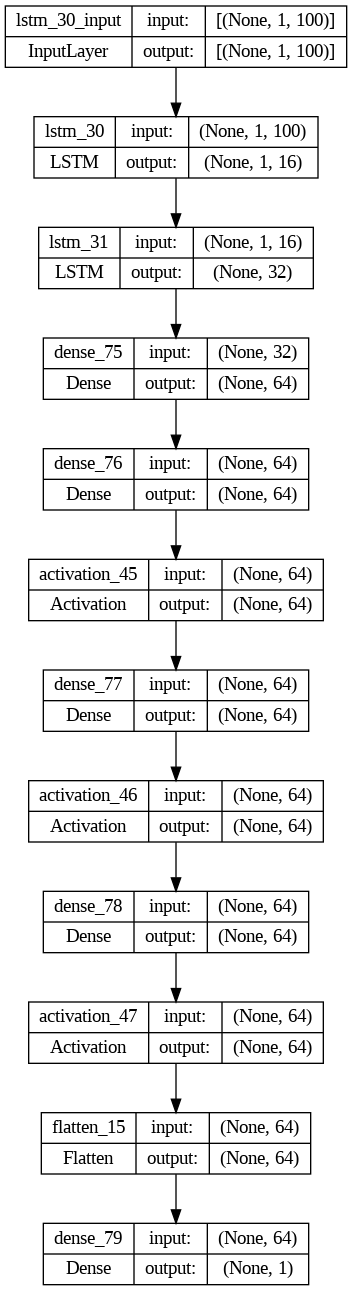

In [417]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [418]:
model.evaluate(test_X, test_Y)

31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0272


[0.001825197134166956, 0.001825197134166956, 0.02716602385044098]

In [419]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.988422
R2 Score: 0.988422
Max Error: 0.332332


31/31 [==============================] - 0s 1ms/step


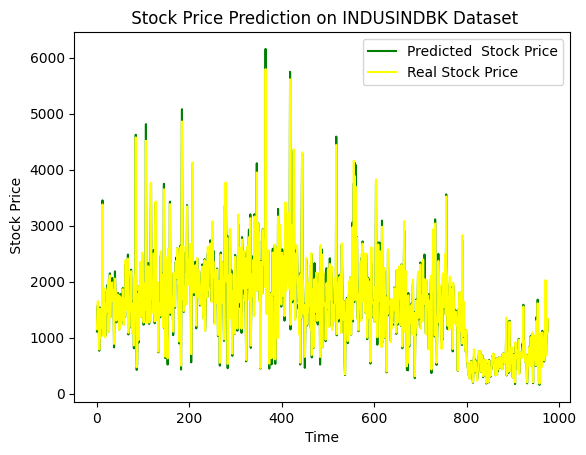

In [420]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on INDUSINDBK Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

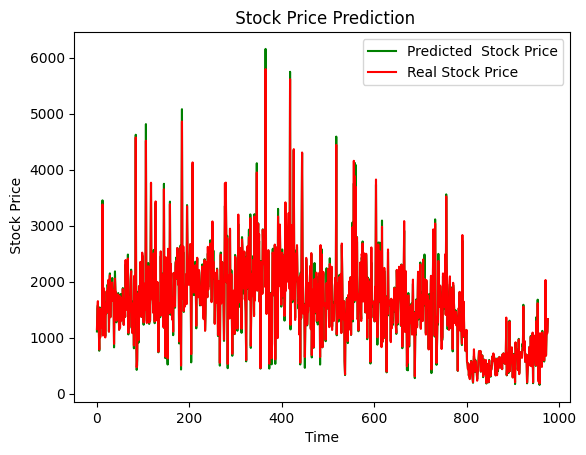

In [421]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [422]:
predicted

array([[1111.2202 ],
       [1514.9321 ],
       [1578.7053 ],
       [1244.9307 ],
       [1205.1182 ],
       [ 766.54395],
       [1539.7135 ],
       [1019.9182 ],
       [1326.4457 ],
       [1184.2736 ],
       [1481.4987 ],
       [1542.1351 ],
       [3450.948  ],
       [1045.058  ],
       [1801.9828 ],
       [1661.7877 ],
       [1619.5146 ],
       [1472.4578 ],
       [1032.3442 ],
       [1587.5276 ],
       [1427.7463 ],
       [1825.6531 ],
       [1452.7158 ],
       [1946.3999 ],
       [1838.3177 ],
       [2000.7007 ],
       [1109.9082 ],
       [1837.1658 ],
       [2147.572  ],
       [1369.1575 ],
       [1781.1759 ],
       [1779.8131 ],
       [1908.7739 ],
       [2065.5933 ],
       [1750.3876 ],
       [1849.5698 ],
       [1710.7057 ],
       [ 827.1886 ],
       [1706.4255 ],
       [2182.8542 ],
       [1793.9825 ],
       [1805.9363 ],
       [1274.2014 ],
       [1431.9138 ],
       [1445.4673 ],
       [1754.4797 ],
       [1796.1876 ],
       [1506.

In [423]:
test_label

array([[1152.52403846],
       [1523.08285354],
       [1651.95333333],
       [1257.58121827],
       [1212.25293132],
       [ 788.69269039],
       [1519.66317073],
       [1003.50692663],
       [1323.50539549],
       [1178.8854418 ],
       [1501.65582656],
       [1504.53342071],
       [3377.27518797],
       [1038.57675906],
       [1890.55081127],
       [1628.79713914],
       [1617.15885798],
       [1486.6295302 ],
       [1003.93557988],
       [1524.36695724],
       [1434.21738752],
       [1825.30215995],
       [1457.41559765],
       [1886.20694864],
       [1891.50328449],
       [2033.1958609 ],
       [1107.23539512],
       [1781.72727273],
       [2111.8132716 ],
       [1362.95011468],
       [1728.37181045],
       [1798.0349076 ],
       [1939.14473684],
       [1984.88888889],
       [1657.70219436],
       [1849.13432836],
       [1691.38474802],
       [ 889.25071225],
       [1707.72858898],
       [2055.02777778],
       [1830.38883679],
       [1820.017

In [424]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0     1152.524038      1111.220215
1     1523.082854      1514.932129
2     1651.953333      1578.705322
3     1257.581218      1244.930664
4     1212.252931      1205.118164
..            ...              ...
972    676.411318       687.490723
973   1047.493969      1052.449097
974   1090.235077      1100.593506
975   1079.796150      1105.270630
976   1332.322581      1331.070679

[977 rows x 2 columns]


In [425]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 1152.5240384615386 |  1111.22021484375  |
|  1  | 1523.0828535444405 |  1514.93212890625  |
|  2  | 1651.9533333333331 | 1578.705322265625  |
|  3  | 1257.5812182741115 |  1244.9306640625   |
|  4  | 1212.252931323283  |  1205.1181640625   |
|  5  | 788.6926903941828  |   766.5439453125   |
|  6  | 1519.6631707317072 | 1539.7135009765625 |
|  7  | 1003.5069266290405 | 1019.918212890625  |
|  8  | 1323.5053954869763 | 1326.4456787109375 |
|  9  | 1178.8854418016776 | 1184.2735595703125 |
| 10  | 1501.6558265582657 | 1481.4986572265625 |
| 11  | 1504.5334207077326 | 1542.1351318359375 |
| 12  | 3377.275187969925  | 3450.947998046875  |
| 13  | 1038.5767590618336 | 1045.0579833984375 |
| 14  | 1890.5508112724165 | 1801.9827880859375 |
| 15  | 1628.7971391417425 | 1661.7877197265625 |
| 16  | 1617.158857979502  |  1619.5146484375   |


In [426]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_31 (LSTM)              (None, 32)                6272      
                                                                 
 dense_75 (Dense)            (None, 64)                2112      
                                                                 
 dense_76 (Dense)            (None, 64)                4160      
                                                                 
 activation_45 (Activation)  (None, 64)                0         
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 activation_46 (Activation)  (None, 64)              

In [427]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))